# 01_track.ipynb
### Use Ocetrac to define track MHW objects 

This notebook provides an example of how one might preprocess gridded sea surface temperature (SST) data to extract anomalies and detect extreme values. Here we will use monthly mean SST from the [NOAA Optimum Interpolation Sea Surface Temperature](https://www.ncdc.noaa.gov/oisst/data-access) (OISST v2.1) dataset. This data is measured from a blend of satellite and in-situ observations. We elect to use data from AVHRR-only satellites. This product is available from September 1981 through present on a 1/4º global regular grid.

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import ocetrac
print('Using OCETRAC version',ocetrac.__version__)

Using OCETRAC version 0.0.10


### 1. Import preprocessed data

In [ ]:
file_path = '/glade/scratch/scanh/MHW_pre/preprocess_mhw_OISST_monthly_noTrend_stn_quarterdegree_global.nc'
da = xr.open_dataset(file_path, decode_times=True)

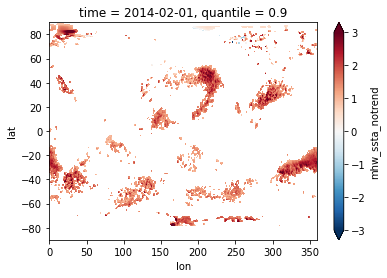

In [ ]:
# plot of SSTA that exceeds a predefined threshold (e.g. 90th percentile)
da.mhw_ssta_notrend[:,:,:,0].sel(time=('2014-2-01')).plot(vmin=-3, vmax=3, cmap='RdBu_r', extend='both');

In [ ]:
%%time
labels = ocetrac.track(da.mhw_ssta_notrend[:,:,:,0], radius=8, area_quantile=0.75)

min area (km2) 	 1380944.65625
inital features identified 	 3592
final features tracked 	 912
CPU times: user 4min 36s, sys: 1min 32s, total: 6min 9s
Wall time: 6min 11s


**The basic output of `ocetrac.track` provides:**
- the minimum object area used to filter out MHWs that are smaller than this threshold. Area is computed for all objects at each time step. `Ocetrac` looks at the global distribution of object area and finds the size that corresponds to a certain percentile defined by `area_quantile`, which can range from 0.0 to 1.0. Larger values for `area_quantile` exclude more MHW objects and will increase the minimum object area threshold. 
- inital features identified have undergone size thresholding, however are not connected in time. 
- final features tracked are the number of unique MHW objects tracked in space and time. 

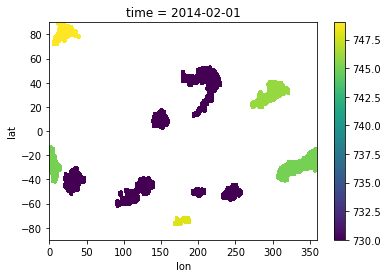

In [ ]:
# Make a quick plot of the labeled MHWs identified with Ocetrac
labels.sel(time=('2014-2-01')).plot();

### Save tracked labels

In [ ]:
# Specify path to save output 
out_path = '/glade/scratch/scanh/ocetrac_data/'

# Convert xarray DatAarray to Dataset
ds = labels.to_dataset(name='ocetrac_labels')
ds.attrs['threshold'] = 0.9

# Save Dataset to netCDF
ds.to_netcdf(out_path+'ocetrac_labels_montly_OISST_noTrend_stn_quarterdegree_global.nc', mode='w')
